# This is my Capstone Final project
### Author: Sankaranarayanan Thirumoorthy

# 1. Introduction
## 1.1 Background

Chennai is the capital city of Tamil Nadu, India and is vastly spread.  The Chennai Metropolitan Area spreads over 1,189 square kilometers and has a population of about 9 million people.  The city is broadly divided into 15 zones.  The local administration aims to provide good healthcare to the public and continues to improve the same.  

For the sake of this project, I am a consulting Data Scientist, to help them provide the necessary guidance on the location of their upcoming healthcare facility.  The administrtion is of the opinion that given the size of the city which continues to expand and the growing population, there is enough scope to increase the number of healthcare facilities.  Of course, they have ear-marked in their budgets a specific sum for new / expansion of healthcare facilities.  The local administration has approached me to help them prioritize where new facilities could be developed, to improve the reach of such facilities to the population.


## 1.2 The Problem

The location of a new healthcare facility will depend on multiple factors, such as the population, already existing facilities, air quality & water quality in the given area, number of households, accessibility & cost factors.  This project aims to group the entire population with these characteristics and recommend possible locations where new factilities could be built.

## Stakeholders

The Local administration is the primary stakeholder, who is interested in creating and maintaining new healthcare facilities.  Apart from them, the general public at large is a key stakeholder, as their contributions by way of local taxes are being spent for such development activities.  So, there is a keen interest by the general public and the local administration to improve the overall healthcare system of the city of Chennai, which will become a Model City for the rest of the state and the country.

# 2. Data Section
## 2.1 Data sources

I plan to use the Foursquare APIs for collecting the location and neighborhood data as well as categories of hospitals / clinics etc.  There have been problems accessing Foursquare website for quite sometime and hence, as an alternative, I plan to carry out webscraping from various sites which contain Chennai's demographic data as well as population and other details. The Chennai Metropolitan Development Authority maintains data related to various parameters grouped by individual Pincodes.  

## 2.2 Data Cleansing

There are different websites which maintain different sets of data, like the Pollution Control Board which maintains the air quality, water quality while the district administration maintains the population, healthcare statistics.  I will need to map the different areas / pin codes / zone codes to the respective rows and arrive at a consolidated dataframe for meaningful analysis.

## 2.3 Feature Selection

The primary features for this project will be the geographical division by way of pincodes, wards, zones with population, number of healthcare facilities, air quality, water quality data.

In [2]:
# Environment preparation
!pip install geopy

!conda install -c conda-forge folium=0.5.0 --yes
import folium

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="CapstoneFinalAssignment")

import pandas as pd


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [3]:
# The code was removed by Watson Studio for sharing.

,Ward No,Zone No,Zone Name,Zonal Office Address,Zonal Officer Email,Zonal Office Landline,Zonal Officer Mobile
0,1,I,THIRUVOTTIYUR,Zonal Officer-Zone-I (Thiruvottriyur)-No.947-T...,aczone1@chennaicorporation.gov.in,25993494,9445490011
1,2,I,THIRUVOTTIYUR,Zonal Officer-Zone-I (Thiruvottriyur)-No.947-T...,aczone1@chennaicorporation.gov.in,25993494,9445490011
2,3,I,THIRUVOTTIYUR,Zonal Officer-Zone-I (Thiruvottriyur)-No.947-T...,aczone1@chennaicorporation.gov.in,25993494,9445490011
3,4,I,THIRUVOTTIYUR,Zonal Officer-Zone-I (Thiruvottriyur)-No.947-T...,aczone1@chennaicorporation.gov.in,25993494,9445490011
4,5,I,THIRUVOTTIYUR,Zonal Officer-Zone-I (Thiruvottriyur)-No.947-T...,aczone1@chennaicorporation.gov.in,25993494,9445490011


In [4]:

body = client_49c4131a947942c88d67e77666c118f1.get_object(Bucket='capstonefinalproject-donotdelete-pr-0kt25n6hcoruvb',Key='Chennai Streets in GCC (Greater Chennai Corporation) Wards   OpenCity.in.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,Ward No,Street Name
0,1,ENNORE KUPPAM 1 STREET
1,1,ENNORE KUPPAM 2 STREET
2,1,ENNORE KUPPAM 3 STREET
3,1,ENNORE KUPPAM 4 STREET
4,1,ENNORE KUPPAM 5 STREET


In [5]:

merged_df = pd.merge (df_data_1, df_data_2)
merged_df.shape


(37056, 8)

In [6]:
# created additional columns for population, airquality, waterquality and households as random data, as they are not available.
# applied the python knowledge learnt in the course to create new columns and applying different functions

import numpy as np 
import pandas as pd 
import random 

population = pd.DataFrame(np.random.randint(1000, 3000000, size=37056))
airquality = pd.DataFrame(np.random.randint(0, 500000, 37056))
waterquality = pd.DataFrame(np.random.randint(10000,50000,37056))
households = pd.DataFrame(random.sample(range(1000, 100000), 37056))

merged_df ['population'] = population
merged_df ['airquality'] = airquality / airquality.max()
merged_df ['waterquality'] = waterquality / waterquality.mean()
merged_df ['households'] = households
merged_df.head()

,Ward No,Zone No,Zone Name,Zonal Office Address,Zonal Officer Email,Zonal Office Landline,Zonal Officer Mobile,Street Name,population,airquality,waterquality,households
0,1,I,THIRUVOTTIYUR,Zonal Officer-Zone-I (Thiruvottriyur)-No.947-T...,aczone1@chennaicorporation.gov.in,25993494,9445490011,ENNORE KUPPAM 1 STREET,13479,0.841274,0.994037,19556
1,1,I,THIRUVOTTIYUR,Zonal Officer-Zone-I (Thiruvottriyur)-No.947-T...,aczone1@chennaicorporation.gov.in,25993494,9445490011,ENNORE KUPPAM 2 STREET,1827788,0.219354,1.149302,37047
2,1,I,THIRUVOTTIYUR,Zonal Officer-Zone-I (Thiruvottriyur)-No.947-T...,aczone1@chennaicorporation.gov.in,25993494,9445490011,ENNORE KUPPAM 3 STREET,132525,0.944732,1.249163,76248
3,1,I,THIRUVOTTIYUR,Zonal Officer-Zone-I (Thiruvottriyur)-No.947-T...,aczone1@chennaicorporation.gov.in,25993494,9445490011,ENNORE KUPPAM 4 STREET,2404926,0.359907,1.105613,3593
4,1,I,THIRUVOTTIYUR,Zonal Officer-Zone-I (Thiruvottriyur)-No.947-T...,aczone1@chennaicorporation.gov.in,25993494,9445490011,ENNORE KUPPAM 5 STREET,268393,0.124146,1.125171,70987


In [7]:
# Analysis
# Preparing the data for cluster analysis
import numpy as np
from sklearn.preprocessing import StandardScaler

X = merged_df.values[:,8:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.72862904,  1.18769287, -0.01546466, -1.07951516],
       [ 0.37273132, -0.9644197 ,  0.38719143, -0.46681894],
       [-1.59074815,  1.54570462,  0.64616543,  0.90636179],
       ...,
       [ 1.32745163,  0.72939823, -0.02031176, -0.46597824],
       [ 1.52876566, -0.27777716, -0.99579201,  1.35746817],
       [ 0.77632185,  1.17551828,  0.03568963,  0.91567956]])

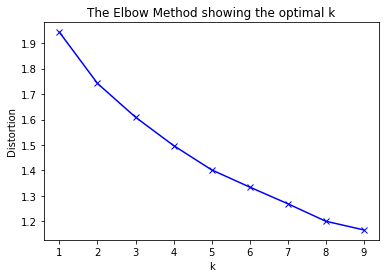

In [9]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(cluster_dataset)
    kmeanModel.fit(cluster_dataset)
    distortions.append(sum(np.min(cdist(cluster_dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / cluster_dataset.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


Visually inspecting the plot, a clear elbow point is not identified. To find
optimal cluster number of our investigation, Silhouette score of k-Means model was used in the next
step of modeling.

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


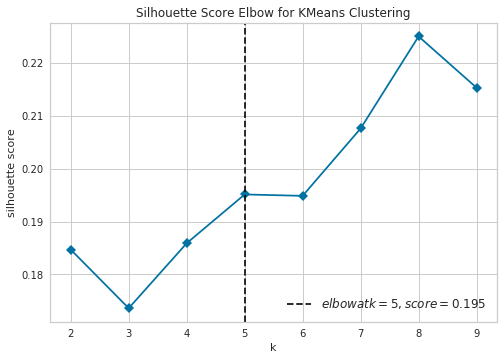

In [17]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeanModel, k=(2,10), metric='silhouette', timings=False)
visualizer.fit(cluster_dataset)    
visualizer.poof()
plt.show()

In [18]:
# preparing the data for displaying the map.  As the Foursquare api is NOT working, tried to use geopy

zone = pd.DataFrame(merged_df['Zone Name'])
zone.rename(columns={'Zone Name' : 'ZoneName'}, inplace=True)
zone = zone.drop_duplicates()

# latitude / longitude data not available for zone SHOZHINGANALLUR and hence it has been dropped from showing on the map
zone.drop(zone[zone['ZoneName'] == 'SOZHINGANALLUR'].index, inplace=True)

zone ['location'] = zone.apply(lambda row: geolocator.geocode(row.ZoneName), axis = 1)
zone ['latitude'] = zone.apply(lambda row: geolocator.geocode(row.ZoneName).latitude, axis = 1)
zone ['longitude'] = zone.apply(lambda row: geolocator.geocode(row.ZoneName).longitude, axis = 1)
zone.head()

,ZoneName,location,latitude,longitude
0,THIRUVOTTIYUR,"(Thiruvottiyur MTC Depot, Ward 5, Zone 1 Tiruv...",13.172222,80.304585
1354,MANALI,"(Manali, Kullu, Himachal Pradesh, India, (32.2...",32.263094,77.188122
2164,MADHAVARAM,"(Madhavaram, Mathavaram, Thiruvallur district,...",13.142931,80.232517
4090,TONDIARPET,"(Tondiarpet, Zone 4 Tondiarpet, சென்னை - Chenn...",13.127767,80.289585
6722,ROYAPURAM,"(Royapuram, Zone 5 Royapuram, சென்னை - Chennai...",13.114619,80.294028


In [19]:
map_chennai = folium.Map(location = [13.079564, 80.239693], 
                                        zoom_start = 10) 
for lat, lng in  zip(zone['latitude'], zone['longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chennai)  
map_chennai
